In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

sns.set_style('white')

In [2]:
# Prepare required indices for two bam files.
# ! samtools index ../data/interim/sb/star/2049_13_11KOU051-R3/alignment.bam
# ! samtools index ../data/interim/sb/star/2800_34_12SKA091-L3/alignment.bam

# Insertion examples

In [3]:
from pathlib import Path
from imfusion.model import Insertion

# Read insertions from file.
insertions = Insertion.read_csv('../data/processed/sb/star/insertions.txt', sep='\t')
insertion_lookup = {ins.id: ins for ins in Insertion.from_frame(insertions)}

# Get junction and bam paths for samples.
base_dir = Path('../data/interim/sb/star')

junction_paths = {fp.parent.parent.name: fp 
                  for fp in base_dir.glob('**/SJ.out.tab')
                  if '_STARpass1' not in str(fp)}

bam_paths = {fp.parent.name: fp 
             for fp in base_dir.glob('**/alignment.bam')}

In [4]:
(insertions.query('gene_name == "Trp53bp2"')
           .sort_values(by='support', ascending=False)
           .head())

,id,seqname,position,strand,support_junction,support_spanning,support,feature_name,feature_strand,feature_type,ffpm,ffpm_junction,ffpm_spanning,gene_id,gene_name,gene_strand,novel_transcript,orientation,sample,transposon_anchor
302,2049_13_11KOU051-R3.INS_4,1,182448400,1,23,0,23,SD,1,SD,1.506165,1.506165,0.0,ENSMUSG00000026510,Trp53bp2,1.0,NaN,sense,2049_13_11KOU051-R3,1043
1827,2800_73_13SKA010-R2.INS_5,1,182448400,1,22,0,22,SD,1,SD,2.717719,2.717719,0.0,ENSMUSG00000026510,Trp53bp2,1.0,NaN,sense,2800_73_13SKA010-R2,1043
1147,2800_37_12SKA092-L4-L5.INS_3,1,182448400,1,9,0,9,SD,1,SD,0.586467,0.586467,0.0,ENSMUSG00000026510,Trp53bp2,1.0,NaN,sense,2800_37_12SKA092-L4-L5,1043
1016,2800_29_12SKA084-L3.INS_5,1,182436897,1,8,0,8,SD,1,SD,1.050100,1.050100,0.0,ENSMUSG00000026510,Trp53bp2,1.0,NaN,sense,2800_29_12SKA084-L3,1043
1859,2800_76_13SKA012-L3.INS_6,1,182448400,1,7,0,7,SD,1,SD,0.453363,0.453363,0.0,ENSMUSG00000026510,Trp53bp2,1.0,NaN,sense,2800_76_13SKA012-L3,1043


In [5]:
insertions['id'].nunique()
insertions.groupby('sample')['id'].nunique().median()
insertions['gene_name'].nunique()

1043

In [6]:
ctgs = pd.read_csv('../data/processed/sb/star/ctgs.txt', sep='\t')
ctgs.query('de_pvalue < 0.05').shape

(14, 8)

In [7]:
(insertions.query('gene_name == "Trps1"')
           .sort_values(by='support', ascending=False)
           .head())

,id,seqname,position,strand,support_junction,support_spanning,support,feature_name,feature_strand,feature_type,ffpm,ffpm_junction,ffpm_spanning,gene_id,gene_name,gene_strand,novel_transcript,orientation,sample,transposon_anchor
1077,2800_34_12SKA091-L3.INS_27,15,50822104,1,142,0,142,En2SA,-1,SA,7.655570,7.655570,0.0,ENSMUSG00000038679,Trps1,-1.0,NaN,antisense,2800_34_12SKA091-L3,1541
976,2800_25_12SKA075-R5.INS_8,15,50822104,1,80,0,80,En2SA,-1,SA,9.291709,9.291709,0.0,ENSMUSG00000038679,Trps1,-1.0,NaN,antisense,2800_25_12SKA075-R5,1541
1518,2800_58_12SKA127-R3.INS_21,15,50822104,1,65,0,65,En2SA,-1,SA,4.185935,4.185935,0.0,ENSMUSG00000038679,Trps1,-1.0,NaN,antisense,2800_58_12SKA127-R3,1541
1128,2800_36_12SKA092-L2.INS_10,15,50846013,1,55,0,55,En2SA,-1,SA,3.477064,3.477064,0.0,ENSMUSG00000038679,Trps1,-1.0,NaN,antisense,2800_36_12SKA092-L2,1541
0,1566_10_11KOU023.INS_14,15,50822104,1,31,0,31,En2SA,-1,SA,1.900036,1.900036,0.0,ENSMUSG00000038679,Trps1,-1.0,NaN,antisense,1566_10_11KOU023,1541


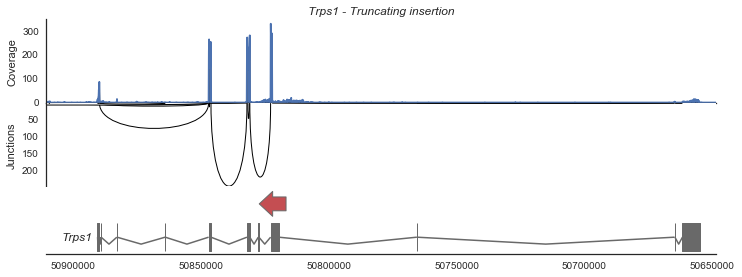

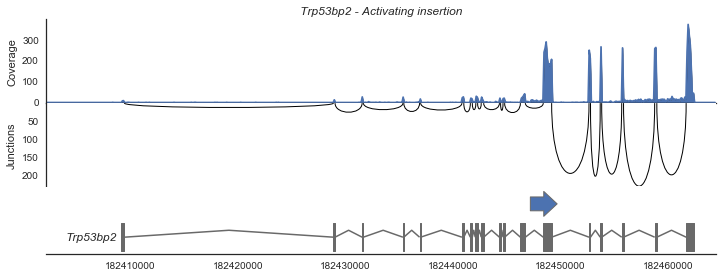

In [8]:
from nbsupport.insertions import plot_insertion

# Plot Trps1 insertion.
insertion = insertion_lookup['2800_34_12SKA091-L3.INS_27']
fig = plot_insertion(insertion, junction_paths[insertion.metadata['sample']],
                     bam_paths[insertion.metadata['sample']],
                     region=('15', 50648752, 50910463), reverse=True)
fig.axes[0].set_title('Trps1 - Truncating insertion', style='italic')

# Plot Trp53bp2 insertion.
insertion = insertion_lookup['2049_13_11KOU051-R3.INS_4']
fig = plot_insertion(insertion, junction_paths[insertion.metadata['sample']],
                     bam_paths[insertion.metadata['sample']],
                     region=('1', 182402172, 182464432), reverse=False)
fig.axes[0].set_title('Trp53bp2 - Activating insertion', style='italic');

In [9]:
with sns.plotting_context('paper', font_scale=0.7):
    # Plot Trps1 insertion.
    insertion = insertion_lookup['2800_34_12SKA091-L3.INS_27']
    fig = plot_insertion(insertion, 
                         junction_paths[insertion.metadata['sample']],
                         bam_paths[insertion.metadata['sample']],
                         region=('15', 50648752, 50910463), reverse=True,
                         figsize=(6.2, 1.5), fontsize=6)
    fig.axes[0].set_title('Trps1 - Truncating insertion', style='italic')
    fig.savefig('../reports/figures/fig_3a_trps1.pdf', bbox_inches='tight')
    plt.close(fig)
    
    # Plot Trp53bp2 insertion.
    insertion = insertion_lookup['2049_13_11KOU051-R3.INS_4']
    fig = plot_insertion(insertion,
                         junction_paths[insertion.metadata['sample']],
                         bam_paths[insertion.metadata['sample']],
                         region=('1', 182402172, 182464432), reverse=False,
                         figsize=(6.2, 1.5), fontsize=6);
    fig.axes[0].set_title('Trp53bp2 - Activating insertion', style='italic');
    fig.savefig('../reports/figures/fig_3c_trp53bp2.pdf', bbox_inches='tight')
    plt.close(fig)

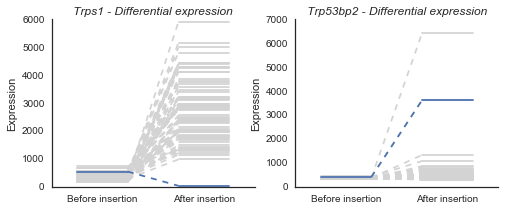

In [10]:
from imfusion.expression import read_exon_counts
from nbsupport import insertions as nb_ins

# Fetch counts and insertion objects.
exon_counts = read_exon_counts('../data/processed/sb/star/expression.txt')
insertion_objs = list(insertion_lookup.values())

# Plot DE for insertions.
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))

nb_ins.plot_single_de(
    insertion_objs, exon_counts, ax=axes[0],
    insertion=insertion_lookup['2800_34_12SKA091-L3.INS_27'])
axes[0].set_title('Trps1 - Differential expression', fontstyle='italic')

nb_ins.plot_single_de(
    insertion_objs, exon_counts, ax=axes[1],
    insertion=insertion_lookup['2049_13_11KOU051-R3.INS_4'])
axes[1].set_title('Trp53bp2 - Differential expression', fontstyle='italic');

In [11]:
with sns.plotting_context('paper', font_scale=0.7):
    # Plot for Trps1.
    fig, ax = plt.subplots(figsize=(2, 1.6))
    
    nb_ins.plot_single_de(
        insertion_objs, exon_counts, ax=ax,
        insertion=insertion_lookup['2800_34_12SKA091-L3.INS_27'])
    ax.set_title('Trps1 - Differential expression', fontstyle='italic')
    
    fig.savefig('../reports/figures/fig_3b_trps1_de.pdf', bbox_inches='tight')
    plt.close(fig)
    
    # Plot for Trp53bp2.
    fig, ax = plt.subplots(figsize=(2, 1.6))
    
    nb_ins.plot_single_de(
        insertion_objs, exon_counts, ax=ax,
        insertion=insertion_lookup['2049_13_11KOU051-R3.INS_4'])
    ax.set_title('Trp53bp2 - Differential expression', fontstyle='italic')

    fig.savefig('../reports/figures/fig_3d_trp53bp2_de.pdf', bbox_inches='tight')
    plt.close(fig)

# Top hits

In [12]:
# Select top DE CTGs for further exploration.
ctgs = (pd.read_csv('../data/processed/sb/star/ctgs.txt', sep='\t')
          .query('de_pvalue <= 0.05')
          .sort_values('n_samples', ascending=False))

ctgs.head(n=6)

,gene_id,gene_name,p_value,q_value,n_samples,de_pvalue,de_direction,de_test
1,ENSMUSG00000038679,Trps1,3.813430e-95,1.315633e-92,44,2.704193e-16,-1,exon
0,ENSMUSG00000019907,Ppp1r12a,2.136308e-99,7.370264e-97,41,2.464145e-17,-1,exon
3,ENSMUSG00000022443,Myh9,9.094464e-70,3.137590e-67,27,9.635713e-09,-1,exon
4,ENSMUSG00000026510,Trp53bp2,2.548673e-27,8.792922e-25,12,2.017131e-07,1,exon
6,ENSMUSG00000022952,Runx1,2.186179e-18,7.542319e-16,10,2.223887e-04,-1,exon
5,ENSMUSG00000032440,Tgfbr2,5.572407e-19,1.922481e-16,9,3.085480e-05,-1,exon


In [13]:
selected_hits = list(ctgs.head(n=6)['gene_name'])
selected_hits

['Trps1', 'Ppp1r12a', 'Myh9', 'Trp53bp2', 'Runx1', 'Tgfbr2']

# Predicting effects

## Transposon feature bias

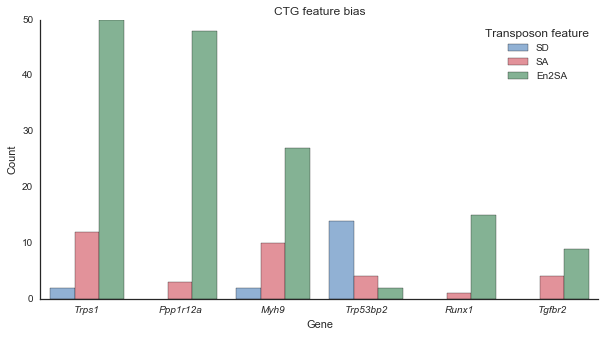

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
nb_ins.plot_feature_bias(insertions, genes=selected_hits, ax=ax)
ax.set_title('CTG feature bias')

with sns.plotting_context('paper', font_scale=0.7):
    fig, ax = plt.subplots(figsize=(4, 2.3))
    nb_ins.plot_feature_bias(insertions, genes=selected_hits, ax=ax)
    ax.set_title('CTG feature bias')
    fig.savefig('../reports/figures/fig_3e_bias.pdf', bbox_inches='tight')
    plt.close(fig)

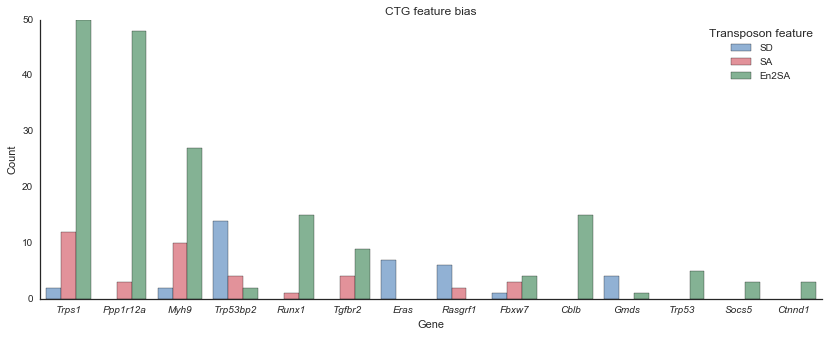

In [15]:
fig, ax = plt.subplots(figsize=(14, 5))
nb_ins.plot_feature_bias(insertions, genes=ctgs['gene_name'], ax=ax)
ax.set_title('CTG feature bias')

with sns.plotting_context('paper', font_scale=0.7):
    fig, ax = plt.subplots(figsize=(8, 2.3))
    nb_ins.plot_feature_bias(insertions, genes=ctgs['gene_name'], ax=ax)
    ax.set_title('CTG feature bias')
    fig.savefig('../reports/supplemental/figures/fig_s2a_bias.pdf', bbox_inches='tight')
    plt.close(fig)

## Differential expression

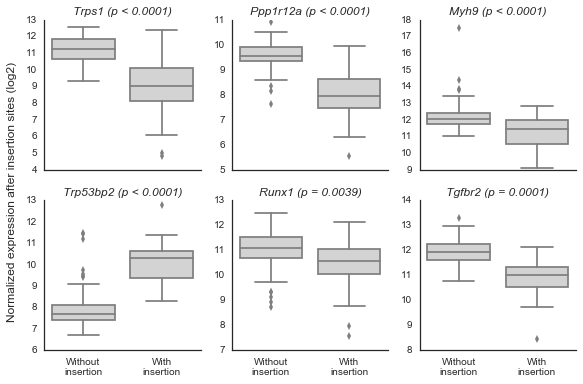

In [16]:
# Create map to translate gene ids to names.
gene_id_map = dict(zip(insertions['gene_name'], insertions['gene_id']))
selected_ids = [gene_id_map[hit] for hit in selected_hits]

# Create plots.
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(8, 5.5))
nb_ins.plot_de_multiple(
    insertion_objs, exon_counts, gene_names=selected_hits,
    gene_ids=selected_ids, fig_axes=(fig, axes));

# Plot for manuscript.
with sns.plotting_context('paper', font_scale=0.7):
    fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(3.8, 2.7))
    nb_ins.plot_de_multiple(
        insertion_objs, exon_counts, gene_names=selected_hits,
        gene_ids=selected_ids, fig_axes=(fig, axes))
    fig.suptitle('CTG differential expression', fontsize=8, y=1.025)
    fig.savefig('../reports/figures/fig_3f_de.pdf', bbox_inches='tight')
    plt.close(fig)

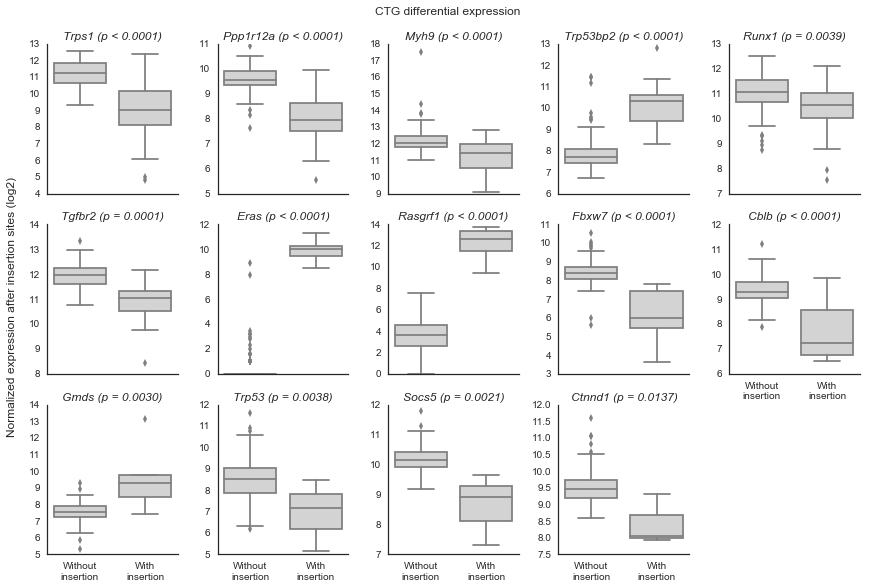

In [17]:
# Plot for all CTGs.
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(12, 8))
nb_ins.plot_de_multiple(
    insertion_objs, exon_counts, gene_names=ctgs['gene_name'],
    gene_ids=ctgs['gene_id'], fig_axes=(fig, axes));

axes[1, -1].set_xticks([0, 1])
axes[-1, -1].axis('off')

fig.suptitle('CTG differential expression', y=1.02, fontsize=12)


# Plot for manuscript.
with sns.plotting_context('paper', font_scale=0.7):
    fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(6.5, 4))
    
    nb_ins.plot_de_multiple(
        insertion_objs, exon_counts, gene_names=ctgs['gene_name'],
        gene_ids=ctgs['gene_id'], fig_axes=(fig, axes));
    
    axes[1, -1].set_xticks([0, 1])
    axes[-1, -1].axis('off')
    
    fig.suptitle('CTG differential expression', y=1.02, fontsize=7)
    
    fig.savefig('../reports/supplemental/figures/fig_s2b_de.pdf', bbox_inches='tight')
    
    plt.close(fig)

In [18]:
from io import StringIO

ctg_overview = (ctgs
 .assign(de_direction=lambda df: df['de_direction'].map({-1: 'down', 1: 'up'}))
 .drop(['de_test', 'gene_id'], axis=1)
 .rename(columns={
#     'gene_id': 'Ensembl ID',
     'gene_name': 'Symbol',
     'p_value': 'CTG p-value',
     'q_value': 'CTG q-value',
     'n_samples': 'Num. samples',
     'de_pvalue': 'DE p-value',
     'de_direction': 'DE direction'
 }))

buf = StringIO()
ctg_overview.to_latex(buf, index=False)

print(buf.getvalue())

\begin{tabular}{lrrrrl}
\toprule
   Symbol &   CTG p-value &   CTG q-value &  Num. samples &    DE p-value & DE direction \\
\midrule
    Trps1 &  3.813430e-95 &  1.315633e-92 &            44 &  2.704193e-16 &         down \\
 Ppp1r12a &  2.136308e-99 &  7.370264e-97 &            41 &  2.464145e-17 &         down \\
     Myh9 &  9.094464e-70 &  3.137590e-67 &            27 &  9.635713e-09 &         down \\
 Trp53bp2 &  2.548673e-27 &  8.792922e-25 &            12 &  2.017131e-07 &           up \\
    Runx1 &  2.186179e-18 &  7.542319e-16 &            10 &  2.223887e-04 &         down \\
   Tgfbr2 &  5.572407e-19 &  1.922481e-16 &             9 &  3.085480e-05 &         down \\
     Eras &  5.665004e-15 &  1.954426e-12 &             6 &  3.939439e-08 &           up \\
  Rasgrf1 &  2.587426e-11 &  8.926619e-09 &             6 &  1.928115e-05 &           up \\
    Fbxw7 &  3.570543e-10 &  1.231837e-07 &             6 &  5.470541e-05 &         down \\
     Cblb &  5.532371e-10 &  1.908668e